# Image Augmentation
___

The project aims to become a multi class and label modeling tool.  Beyond the simple clean and dirty classification is the measure of its current state versus the state of holds that have been accepted for various cargoes.  To this end, the model will need to learn well labeled examples for each.  This can be more challenging for cargoes where the standard is higher.

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img, smart_resize, ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Rescaling, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [48]:
# data augmentation
datagen = ImageDataGenerator(
    brightness_range=(0.5, 1.5),
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=[0.4, 0.6],
    channel_shift_range=100,
    horizontal_flip=True,
    validation_split=0.1,
    fill_mode='nearest'
)

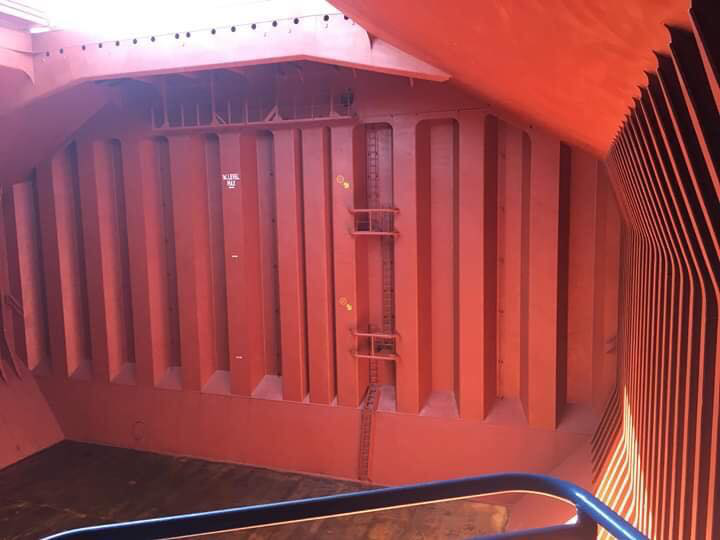

In [49]:
img = load_img('../data/cargo_holds/clean_website_reviewed/47681173_2008763662504219_1873423245131120640_n.jpg')
img

In [50]:
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1, save_to_dir='../data/single_augmented', save_prefix='aug', save_format='jpg'):
    i += 1
    if i > 100:
        break

### Augmenting an imbalanced dataset
___

In [52]:
# model for image classification
model = Sequential()
model.add(Input((128, 128, 3)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer='l2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))

#model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l2'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer='adam', loss='bce', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 254016)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               32514176  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [53]:
# Dataset Augmenters

batch_size = 16
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=(0.5, 1.5),
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=[0.4, 0.6],
    channel_shift_range=100,
    horizontal_flip=True,
    validation_split=0.1,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [55]:
# Augmenting data

train_generator = train_datagen.flow_from_directory(
    '../data/cargo_holds/',
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generaotr = validation_datagen.flow_from_directory(
    '../data/cargo_holds/',
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='binary'
)

Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [62]:
# Model checkpoint
filepath = '../assets/saved_models/weights-imporvement-{epoch:02d}--{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [60]:
# Fit model
model.fit(
    train_generator,
    #steps_per_epoch=2000 // batch_size,
    epochs=5,
    validation_data = validation_generaotr,
    #validation_steps=800 // batch_size,
    callbacks=callbacks_list
)

model.save('cargo_holds_model_')

Epoch 1/5
8/8 [==============================] - ETA: 0s - loss: 1.3200 - accuracy: 0.7583

KeyError: 'Failed to format this callback filepath: "saved_models/weights-imporvement-{epoch:02d}--{val_acc:.2f}.hdf5". Reason: \'val_acc\''